<a href="https://colab.research.google.com/github/silasautomata/Projeto-Pratico-Case-Unicornios/blob/main/Projeto_Pr%C3%A1tico_Case_Unic%C3%B3rnios_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o conjunto de dados\
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

In [ ]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler os dados
base_dados = pd.read_csv('/content/unicorns till sep 2022.csv')

# Verificar Dimensão
base_dados.shape

(1186, 7)

In [ ]:
base_dados.head()# primeiros registros

,empresa,valor,data de adesao,pais,City,Industry,investidores,mes,ano
ID,,,,,,,,,
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
base_dados.columns # colunas

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
#renomear as colunas
base_dados.rename(columns={
    'Company' :'empresa',
    'Valuation ($B)':'valor',
    'Date Joined':'data de adesao',
    'Country':'pais',
    'City	':'cidade',
    'Industry	': 'setor',
    'Investors': 'investidores',

},inplace=True )

 com o .info pedimos a informaçao dos tipos da colunas, buscando erros e convertendo as colunas de numero para int ou float ou data

In [ ]:
base_dados.info() # tipos de informaçoes

#e necessario a conversao das colunas valor e data pois nao sao str mais sim data e int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   empresa         1186 non-null   object
 1   valor           1186 non-null   object
 2   data de adesao  1186 non-null   object
 3   pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
base_dados.isnull().sum() # campos nulos
# achei 18 campos nulos na coluna de invewtidores

,0
empresa,0
valor,0
data de adesao,0
pais,0
City,0
Industry,0
investidores,18


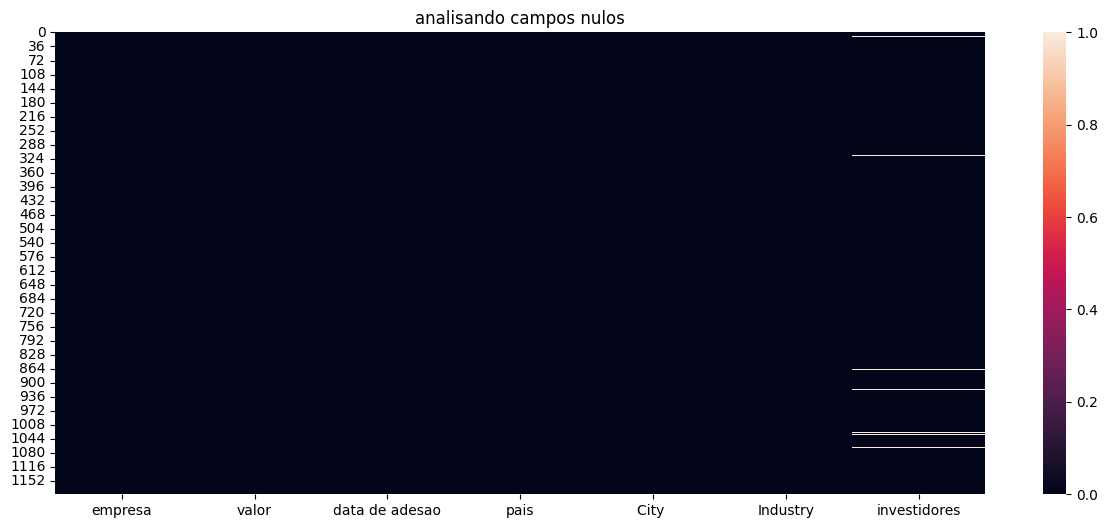

In [ ]:
# grafico de campos nulos
plt.figure(figsize=(15,6)) # tamanhho do grafico
plt.title('analisando campos nulos') # titulo
sns.heatmap(base_dados.isnull(), ); # gera um grafico com as linha nulas da coluna investidores

In [ ]:
# campos unicos
base_dados.nunique()

,0
empresa,1183
valor,222
data de adesao,695
pais,48
City,286
Industry,34
investidores,1152


In [ ]:
# valores unicos
base_dados['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
# valores unicos - ranl
base_dados['Industry'].value_counts() # conta todos os valores e organiza do maior ao menor

,count
Industry,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
Other,65
"Supply chain, logistics, & delivery",65
Cybersecurity,58
Data management & analytics,45


In [ ]:
# valores unicos - rank
base_dados['Industry'].value_counts(normalize=True)

,proportion
Industry,
Fintech,0.201518
Internet software & services,0.188870
E-commerce & direct-to-consumer,0.086847
Health,0.079258
Artificial intelligence,0.062395
Other,0.054806
"Supply chain, logistics, & delivery",0.054806
Cybersecurity,0.048904
Data management & analytics,0.037943


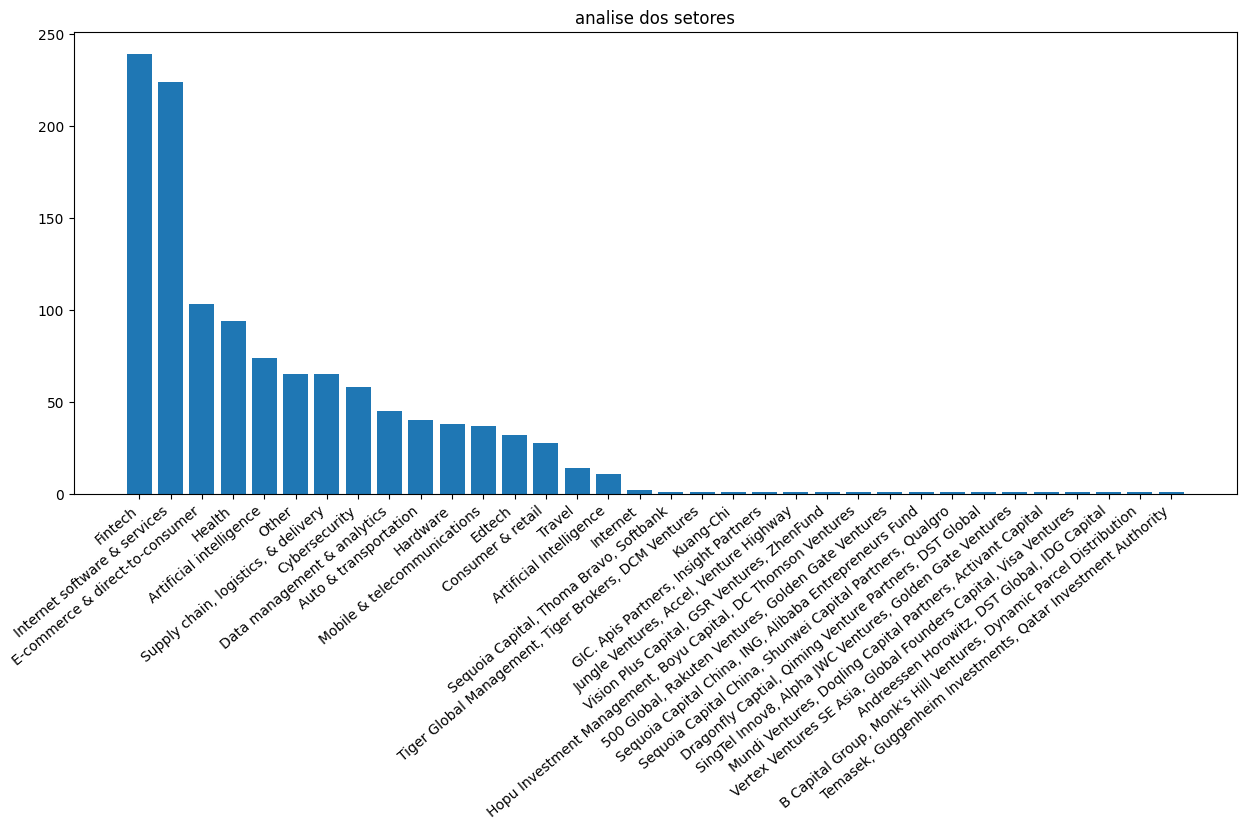

In [ ]:
plt.figure(figsize=(15,6)) # tamanhho do grafico
plt.title('analise dos setores') # titulo
plt.bar(base_dados['Industry'].value_counts().index,base_dados['Industry'].value_counts()) # pegar a coluna de indutria e ordena pelos valores maiores ao menor- resentando o index
plt.xticks(rotation=40, ha='right'); # Isso melhora a legibilidade, principalmente se os nomes forem longos.

In [ ]:
base_dados['pais'].value_counts()
# o brasil esta em 9 lugar nos paises em que mais gera unicornios no mundo

,count
pais,
United States,636
China,174
India,70
United Kingdom,46
Germany,29
France,24
Israel,22
Canada,19
Brazil,17


In [ ]:
# pega a coluna pais e arredonda os valores para uma casa decimal-ordenando por frequencia e Multiplica os valores por 100 para transformar as proporções em porcentagens.
analise = round(base_dados['pais'].value_counts(normalize=True) * 100,1)

In [ ]:
analise

,proportion
pais,
United States,53.6
China,14.7
India,5.9
United Kingdom,3.9
Germany,2.4
France,2.0
Israel,1.9
Canada,1.6
Brazil,1.4


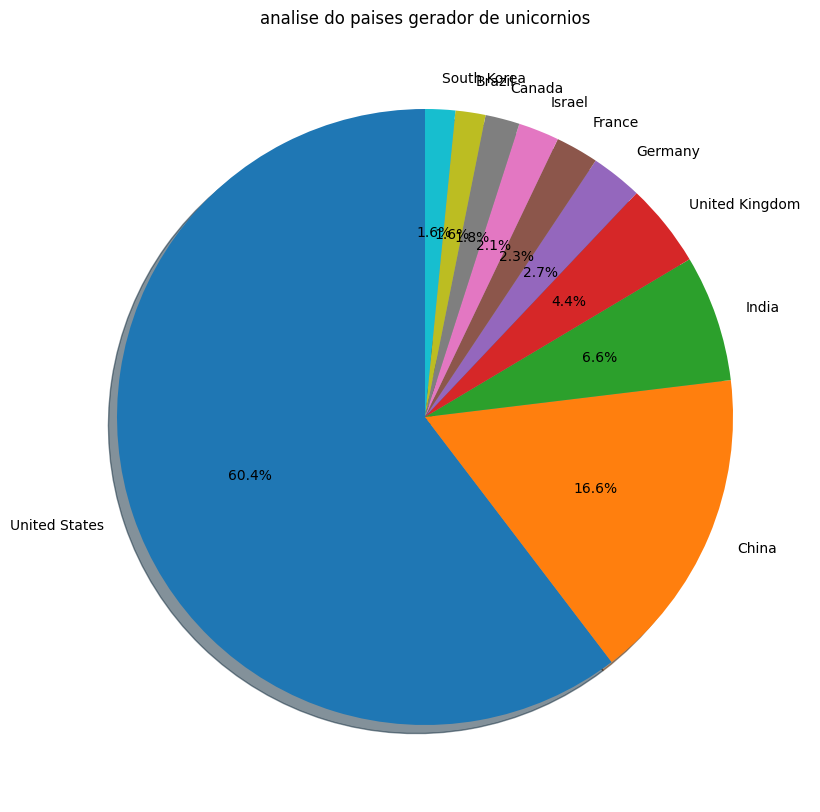

In [ ]:
plt.figure(figsize=(25,10)) # tamando do grafico
plt.title('analise do paises gerador de unicornios') # titulo do grafico
plt.pie(
    analise.head(10),
    labels = analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct = '%1.1f%%'
); # gera uma grafico de pizza que pega os 10 paises-
   # pega os 10 primeiros nomes e define o index
   # gera uma sombra
   # pega o angulo da pizza obs: pode ser ate 360
   # exibe a porcentagem em cada fatia, com 1 casa decimal.

In [ ]:
# conversao para data
# no dataframe a coluna data esta como objeto, sendo necessario a sua conversao para data
base_dados['data de adesao']=pd.to_datetime(base_dados['data de adesao'])

base_dados['data de adesao'].head()

,data de adesao
0,2017-04-07
1,2012-12-01
2,2018-07-03
3,2014-01-23
4,2018-01-08


In [ ]:
# gera nova coluna-atraves da coluna data- extraindo os meses e anos
base_dados['mes']=pd.DatetimeIndex(base_dados['data de adesao']).month # extrair mes
base_dados['ano']=pd.DatetimeIndex(base_dados['data de adesao']).year # extrair ano

base_dados.head()

,empresa,valor,data de adesao,pais,City,Industry,investidores,mes,ano
ID,,,,,,,,,
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# tabela analitica
  # agrupa as colunas-contando os investidores-resentando o index
analise_agrupada = base_dados.groupby(by=['pais','ano','mes','empresa']).count()['investidores'].reset_index().rename_axis('ID')

analise_agrupada

,pais,ano,mes,empresa,investidores
ID,,,,,
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1


In [ ]:
# localiza  a coluna paiz e pega todas as linhas que possuem o brasil como resultado
analise_agrupada.loc[
    analise_agrupada['pais'] == 'Brazil']

,pais,ano,mes,empresa,investidores
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [ ]:
# transformando a coluna valor
                  # converte a coluna valore de str para numerico que substitui o $ ou nada
                  # gerando assim uma cnova coluna valor
base_dados['valor'] = pd.to_numeric(base_dados['valor'].astype(str).str.replace('$',''), errors='coerce')
base_dados.head()

,empresa,valor,data de adesao,pais,City,Industry,investidores,mes,ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analitica
analise_pais = base_dados.groupby(by=['pais'])['valor'].sum().reset_index()
#              grupa as colunas fazendo uma soma de valores e resentando o index
analise_pais.head()

,pais,valor
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
             # ordena a coluna valor pelos valores maiores
analise_valor = analise_pais.sort_values('valor', ascending=False)
analise_valor.head()

,pais,valor
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


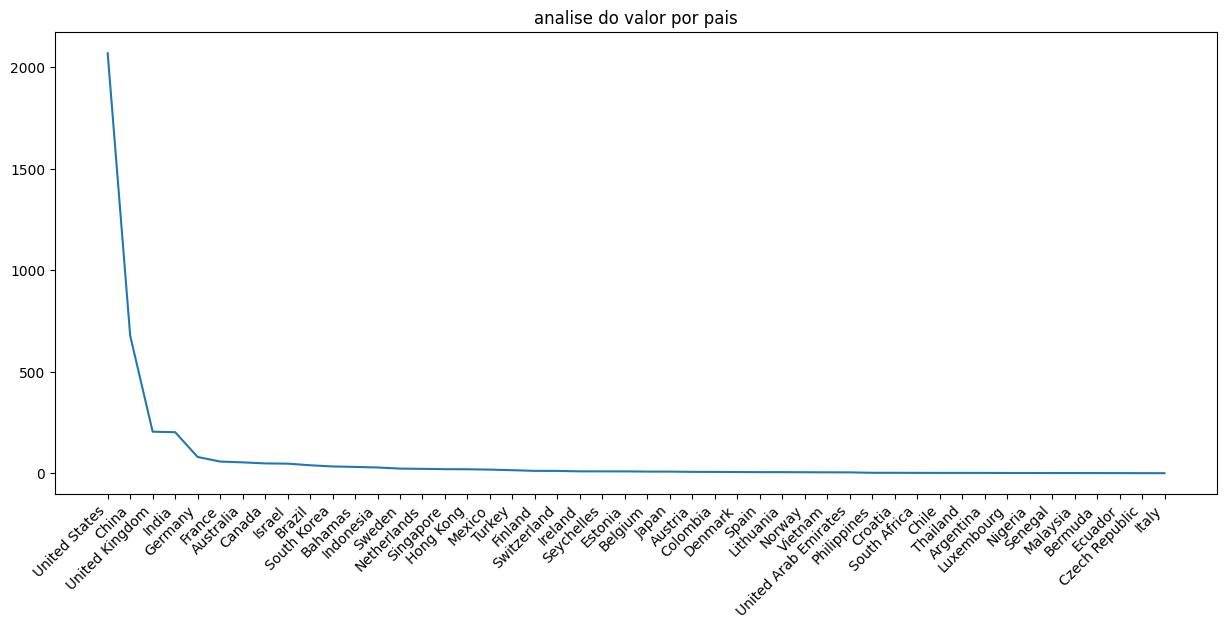

In [ ]:
plt.figure(figsize=(15,6)) # tamando do grafio
plt.plot(analise_valor['pais'], analise_valor['valor']) # eixo dos lados vai gerar o valor -eixo de baixo os paises
plt.title('analise do valor por pais') # titulo
plt.xticks(rotation=45, ha='right'); # angulo dos nomes abaixo e para o lado direito